{"code":0,"msg":null,"data":"","operation_date":"2025-08-04 17:11:33"}
<Response [200]>


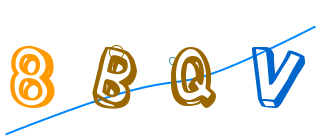

验证码： 8bqv



{"code":0,"msg":null,"data":"1754298702243","operation_date":"2025-08-04 17:11:42"}
<Response [200]>

1754298702243

Xrh0R8CA/W+biKu0CEJPuQJ7Dp/UI/QXl1rqremH7uanMcAKBFDDxFzK+pBYazfdbFhQLjRbjZ+QMORWCWKg572hBXVh1LYpFTK8mK2A13jYcrKJpq0eByv7x7X2C6vpDUA/LQtsL0iFPf35ugWn/TO1TmtBGxG60Yh1BD8KMCk=

{"code":9,"msg":"用户名或密码错误","data":null,"operation_date":"2025-08-04 17:11:42"}
<Response [200]>


In [1]:
import requests
from base64 import b64decode
from PIL import Image
import execjs
import json


headers = {
    "Accept": "application/json, text/javascript, */*; q=0.01",
    "Accept-Language": "zh-CN,zh;q=0.9,en;q=0.8",
    "Cache-Control": "no-cache",
    "Connection": "keep-alive",
    "Content-Length": "0",
    "Content-Type": "application/json;charset=UTF-8",
    "EagleEye-SessionID": "dUmnhd4qwUyv8m78w2z2fhX3RRq8",
    "EagleEye-TraceID": "5ae35a581754297744282101381d1d",
    "EagleEye-pAppName": "ihuy5j2ab7@7cd9bc63da81d1d",
    "Origin": "https://user.wangxiao.cn",
    "Pragma": "no-cache",
    "Referer": "https://user.wangxiao.cn/login",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest",
    "sec-ch-ua": "\"Not)A;Brand\";v=\"8\", \"Chromium\";v=\"138\", \"Google Chrome\";v=\"138\"",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "\"Windows\"",
    "sessionId": "1754286728715",
    "source": "pc",
    "token;": ""
}
cookies = {
    "sessionId": "1754286728715",
    "Hm_lvt_86efc728d941baa56ce968a5ad7bae5f": "1754286729",
    "HMACCOUNT": "180D1B1278F51E25",
    "_bl_uid": "8nm31dI4w59p8a0nXvqq54w90a8e",
    "Hm_lpvt_86efc728d941baa56ce968a5ad7bae5f": "1754297097"
}
response = requests.post('https://user.wangxiao.cn/apis//common/getImageCaptcha',
                         headers=headers,
                         cookies=cookies)

print(response.text)
print(response)
print()

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

with open('./pic.png', 'wb') as pic:
    pic.write(b64decode(response.json()['data'].removeprefix('data:image/png;base64,')))

img = Image.open('./pic.png').convert('RGB')

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

captcha = input('验证码：')
print()

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

headers = {
    "Accept": "application/json, text/javascript, */*; q=0.01",
    "Accept-Language": "zh-CN,zh;q=0.9,en;q=0.8",
    "Cache-Control": "no-cache",
    "Connection": "keep-alive",
    "Content-Length": "0",
    "Content-Type": "application/json;charset=UTF-8",
    "EagleEye-SessionID": "dUmnhd4qwUyv8m78w2z2fhX3RRq8",
    "EagleEye-TraceID": "5ae35a581754297127353100281d1d",
    "EagleEye-pAppName": "ihuy5j2ab7@7cd9bc63da81d1d",
    "Origin": "https://user.wangxiao.cn",
    "Pragma": "no-cache",
    "Referer": "https://user.wangxiao.cn/login",
    "Sec-Fetch-Dest": "empty",
    "Sec-Fetch-Mode": "cors",
    "Sec-Fetch-Site": "same-origin",
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/138.0.0.0 Safari/537.36",
    "X-Requested-With": "XMLHttpRequest",
    "sec-ch-ua": "\"Not)A;Brand\";v=\"8\", \"Chromium\";v=\"138\", \"Google Chrome\";v=\"138\"",
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "\"Windows\"",
    "sessionId": "1754286728715",
    "source": "pc",
    "token;": ""
}
response = requests.post('https://user.wangxiao.cn/apis//common/getTime',
                         headers=headers,
                         cookies=cookies)

print(response.text)
print(response)
print()

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

timestamp = response.json()['data']
print(timestamp)
print()

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

with open('./js_encrypt.js', 'r', encoding='utf-8') as f:
    js = execjs.compile(f.read())

pwd = js.call('encrypt', '123456' + '' + timestamp)
print(pwd)
print()

# = = =  = = =  = = =   = = =  = = =  = = =   = = =  = = =  = = =

headers = {'Content-Type': 'application/json;charset=UTF-8'}
data = {'userName': '13756268412',
        'password': pwd,
        'imageCaptchaCode': captcha}
data = json.dumps(data, separators=(',', ':'))
response = requests.post('https://user.wangxiao.cn/apis//login/passwordLogin',
                         headers=headers,
                         cookies=cookies,
                         data=data)

print(response.text)
print(response)
